In [1]:
#import Pandas and seaborn
import pandas as pd
import seaborn as sns

In [2]:
#read the csv file into a dataframe df
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
# data types
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [4]:
df.shape

(101766, 50)

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
#clean up task - remove unwanted columns
drop_cols=['weight',
'payer_code',
'medical_specialty',
'diag_1',
'diag_2',
'diag_3',
'metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'examide',
'citoglipton',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone',
]
df.drop(drop_cols, inplace =True, axis =1)

In [7]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
insulin                     object
change                      object
diabetesMed                 object
readmitted                  object
dtype: object

In [8]:
df.shape

(101766, 22)

In [9]:
#maximum number of days in hospital
df['time_in_hospital'].max()
# max days =14

14

In [10]:
df[(df['time_in_hospital']==14)&(df['admission_type_id']==1)&(df['discharge_disposition_id']==1)]
#148 admissions under 'Emergency' and statyed in hospital for 14 days and were 'discharged to home/self care'

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
1539,10441134,1264860,AfricanAmerican,Male,[40-50),1,1,7,14,51,...,0,0,0,7,None,None,Up,Ch,Yes,NO
2194,14306628,292419,Caucasian,Male,[40-50),1,1,7,14,61,...,0,0,0,4,None,None,No,Ch,Yes,>30
2521,16405950,2749761,Caucasian,Female,[60-70),1,1,7,14,63,...,0,0,1,9,None,>7,Steady,Ch,Yes,>30
2558,16599330,1144719,AfricanAmerican,Female,[30-40),1,1,7,14,60,...,0,0,0,9,None,None,Steady,No,Yes,>30
2569,16680912,602658,Caucasian,Female,[80-90),1,1,7,14,57,...,0,0,0,9,None,None,No,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99174,410251892,53771220,AfricanAmerican,Female,[50-60),1,1,7,14,47,...,0,4,3,9,None,None,Down,Ch,Yes,>30
100413,425502494,164144741,Caucasian,Male,[60-70),1,1,7,14,59,...,0,0,0,9,None,None,Up,Ch,Yes,NO
100874,431998226,86373432,Caucasian,Female,[60-70),1,1,7,14,74,...,4,0,0,9,None,None,No,Ch,Yes,<30
101631,442012304,42673770,AfricanAmerican,Male,[40-50),1,1,7,14,35,...,0,1,1,9,None,None,Up,Ch,Yes,NO


In [11]:
#all emergency with 14 days 
dfEmergency14=df[(df['time_in_hospital']==14)&(df['admission_type_id']==1)]

In [12]:
#all emergency
dfEmergency=df[(df['admission_type_id']==1)]

In [13]:
dfEmergency14.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,5.000000e+02,5.000000e+02,500.0,500.000000,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.428189e+08,4.671266e+07,1.0,5.750000,6.794000,14.0,59.632000,2.588000,26.660000,0.282000,0.130000,0.834000,8.430000
std,9.850765e+07,3.938816e+07,0.0,6.297525,1.256472,0.0,18.391113,1.953943,10.380361,1.004238,0.581185,1.423551,1.214929
min,1.810752e+06,1.188090e+05,1.0,1.000000,1.000000,14.0,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,4.000000
25%,6.609387e+07,1.245220e+07,1.0,1.000000,7.000000,14.0,48.000000,1.000000,20.000000,0.000000,0.000000,0.000000,9.000000
50%,1.238659e+08,3.865967e+07,1.0,3.000000,7.000000,14.0,60.000000,2.000000,25.000000,0.000000,0.000000,0.000000,9.000000
75%,1.916406e+08,8.033821e+07,1.0,6.000000,7.000000,14.0,73.000000,4.000000,32.000000,0.000000,0.000000,1.000000,9.000000
max,4.438420e+08,1.894815e+08,1.0,28.000000,17.000000,14.0,108.000000,6.000000,72.000000,14.000000,9.000000,15.000000,9.000000


In [14]:
dfEmergency.describe()
#53,990 Emergency

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,5.399000e+04,5.399000e+04,53990.0,53990.000000,53990.000000,53990.000000,53990.000000,53990.000000,53990.000000,53990.000000,53990.000000,53990.000000,53990.000000
mean,1.747640e+08,5.418422e+07,1.0,3.595499,6.837414,4.378274,47.245286,1.018837,15.385219,0.372939,0.210539,0.686590,7.611187
std,1.057930e+08,3.937706e+07,0.0,4.941625,1.605368,2.924031,18.063833,1.537915,7.464818,1.301669,0.842347,1.322687,1.875064
min,1.668000e+04,1.350000e+02,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.867242e+07,2.326586e+07,1.0,1.000000,7.000000,2.000000,38.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.596839e+08,4.701648e+07,1.0,1.000000,7.000000,4.000000,48.000000,0.000000,14.000000,0.000000,0.000000,0.000000,9.000000
75%,2.442043e+08,8.598623e+07,1.0,3.000000,7.000000,6.000000,59.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.894815e+08,1.0,28.000000,25.000000,14.000000,132.000000,6.000000,75.000000,42.000000,42.000000,21.000000,16.000000


In [15]:
#all non-emergency
dfNonEmergency=df[(df['admission_type_id']!=1)]

In [16]:
dfNonEmergency.describe()
#47,776 non emergencies

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,4.777600e+04,4.777600e+04,47776.000000,47776.000000,47776.000000,47776.000000,47776.000000,47776.000000,47776.000000,47776.000000,47776.000000,47776.000000,47776.000000
mean,1.543956e+08,5.449560e+07,3.181200,3.851411,4.530601,4.416004,38.406271,1.702361,16.741272,0.365309,0.183481,0.577905,7.209498
std,9.783940e+07,3.791215e+07,1.387817,5.635297,5.426464,3.052566,20.354905,1.810358,8.761338,1.227227,1.020764,1.189031,1.976164
min,1.252200e+04,1.350000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.127745e+07,2.354850e+07,2.000000,1.000000,1.000000,2.000000,24.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.422094e+08,4.449973e+07,3.000000,1.000000,1.000000,4.000000,39.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.075526e+08,8.964118e+07,3.000000,4.000000,7.000000,6.000000,53.000000,3.000000,21.000000,0.000000,0.000000,1.000000,9.000000
max,4.438572e+08,1.895026e+08,8.000000,28.000000,22.000000,14.000000,129.000000,6.000000,81.000000,36.000000,76.000000,19.000000,16.000000


In [17]:
#similar to pivot in excel. count per admission tyoe
df.groupby('admission_type_id')['encounter_id'].count()
#1	Emergency
#2	Urgent

admission_type_id
1    53990
2    18480
3    18869
4       10
5     4785
6     5291
7       21
8      320
Name: encounter_id, dtype: int64

In [18]:
#similar to pivot in excel - count by race
df.groupby('race')['encounter_id'].count()
# majority of data for Caucasian

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: encounter_id, dtype: int64

In [19]:
# count by gender
df.groupby('gender')['encounter_id'].count()
#more female than male

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: encounter_id, dtype: int64

In [20]:
#unique patients
df['patient_nbr'].unique().size
# 71518 patients only. so there are multiple rows for the same patient in the dataset

71518

In [21]:
df.groupby(['patient_nbr'])['encounter_id'].count().sort_values()
# patient nbr 88785891 was admitted 40 times!!!

patient_nbr
48164949     1
67633857     1
67633893     1
67636341     1
67638249     1
            ..
23199021    23
1660293     23
88227540    23
43140906    28
88785891    40
Name: encounter_id, Length: 71518, dtype: int64

In [22]:
df.groupby(['age','readmitted'])['encounter_id'].count()

age       readmitted
[0-10)    <30               3
          >30              26
          NO              132
[10-20)   <30              40
          >30             224
          NO              427
[20-30)   <30             236
          >30             510
          NO              911
[30-40)   <30             424
          >30            1187
          NO             2164
[40-50)   <30            1027
          >30            3278
          NO             5380
[50-60)   <30            1668
          >30            5917
          NO             9671
[60-70)   <30            2502
          >30            7897
          NO            12084
[70-80)   <30            3069
          >30            9475
          NO            13524
[80-90)   <30            2078
          >30            6223
          NO             8896
[90-100)  <30             310
          >30             808
          NO             1675
Name: encounter_id, dtype: int64

In [23]:
df.groupby(['insulin','readmitted'])['encounter_id'].count()

insulin  readmitted
Down     <30            1698
         >30            4752
         NO             5768
No       <30            4756
         >30           15949
         NO            26678
Steady   <30            3433
         >30           10482
         NO            16934
Up       <30            1470
         >30            4362
         NO             5484
Name: encounter_id, dtype: int64

In [24]:
df.groupby(['insulin'])['num_medications'].mean()

insulin
Down      19.018825
No        14.209231
Steady    16.294045
Up        19.633793
Name: num_medications, dtype: float64

<AxesSubplot:xlabel='readmitted', ylabel='Count'>

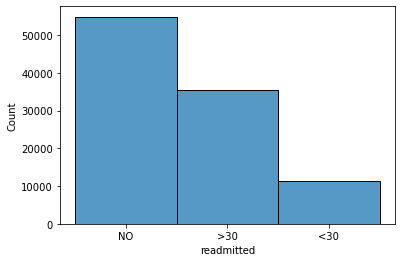

In [25]:
# add visualizations - how many by readmissions
sns.histplot(x="readmitted",data=df)

<AxesSubplot:xlabel='insulin', ylabel='num_medications'>

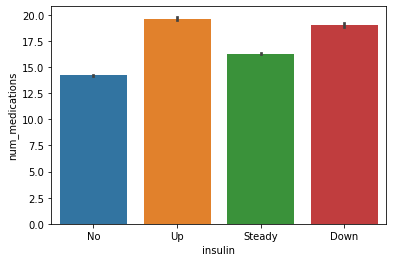

In [26]:
# add visualizations 
sns.barplot(x="insulin", y="num_medications", data =df)

<AxesSubplot:xlabel='insulin', ylabel='num_medications'>

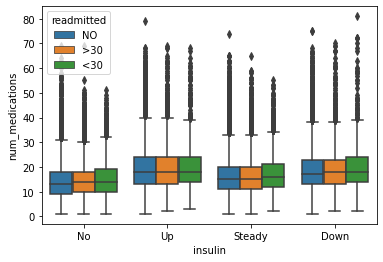

In [27]:
sns.boxplot(x="insulin", y="num_medications",data=df,hue='readmitted')

In [28]:
dfmale=df[df['gender']=='Male']

In [29]:
#comparing one gender against other 
df.groupby([df['gender']=='Male']).describe()

encounter_id                                                   \
              count          mean           std      min         25%   
gender                                                                 
False       54711.0  1.646313e+08  1.020588e+08  12522.0  85501644.0   
True        47055.0  1.658648e+08  1.033094e+08  16680.0  84370632.0   

                                              patient_nbr                ...  \
                50%          75%          max       count          mean  ...   
gender                                                                   ...   
False   151883304.0  228865536.0  443857166.0     54711.0  5.409294e+07  ...   
True    152886924.0  231841734.0  443867222.0     47055.0  5.460650e+07  ...   

       number_inpatient       number_diagnoses                                \
                    75%   max            count      mean       std  min  25%   
gender                                                                         
False               1.0  21.0          54711.0  7.428561  1.923517  1.0  6.0   
True                1.0  19.0          47055.0  7.415684  1.945255  1.0  6.0   

                        
        50%  75%   max  
gender                  
False   8.0  9.0  16.0  
True    8.0  9.0  16.0  

[2 rows x 104 columns]

## Conclusions
#Most admisssions were on 'Emergency' type. Data shows time spend in hospital between 1 to 14 days
#Average (mean) num_medications for 'No' insulin seems to be lower than those who had steady/up/down insulin.